In [1]:
import calendar
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from market_analytics import load_and_preprocess_data, resample_data, add_returns_pct

sns.set_theme()

# Get monthly and quarterly price statistics on BTC and ETH

Data sourced from open source Kraken OHLCV data

In [9]:
data_path = Path("..", "data", "Kraken_OHLCVT")

In [10]:
df_btc = load_and_preprocess_data(data_path / "XBTUSD_1440.csv")
df_eth = load_and_preprocess_data(data_path / "ETHUSD_1440.csv")

In [4]:
df_btc_monthly = resample_data(df_btc, rule="M")
df_eth_monthly = resample_data(df_eth, rule="M")

Text(0, 0.5, '')

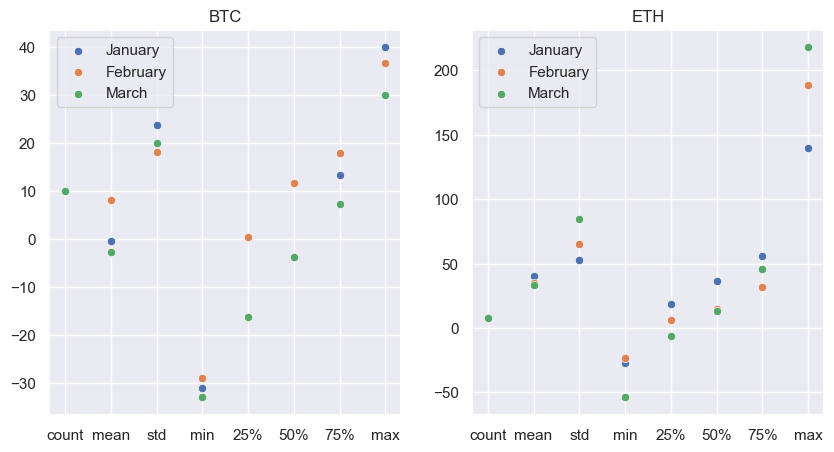

In [5]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10, 5))

months = [1, 2, 3]

for month in months:
    df = add_returns_pct(df_btc_monthly[df_btc_monthly.index.month == month].copy())
    stats = df["returns_pct"].describe()
    sns.scatterplot(stats, ax=ax, label=calendar.month_name[month])

    df = add_returns_pct(df_eth_monthly[df_eth_monthly.index.month == month].copy())
    stats = df["returns_pct"].describe()
    sns.scatterplot(stats, ax=ax1, label=calendar.month_name[month])

ax.set_title("BTC")
ax1.set_title("ETH")
ax.set_ylabel("")
ax1.set_ylabel("")

In [14]:
df_btc_quarterly = resample_data(df_btc, rule="Q")
df_eth_quarterly = resample_data(df_eth, rule="Q")

Text(0, 0.5, '')

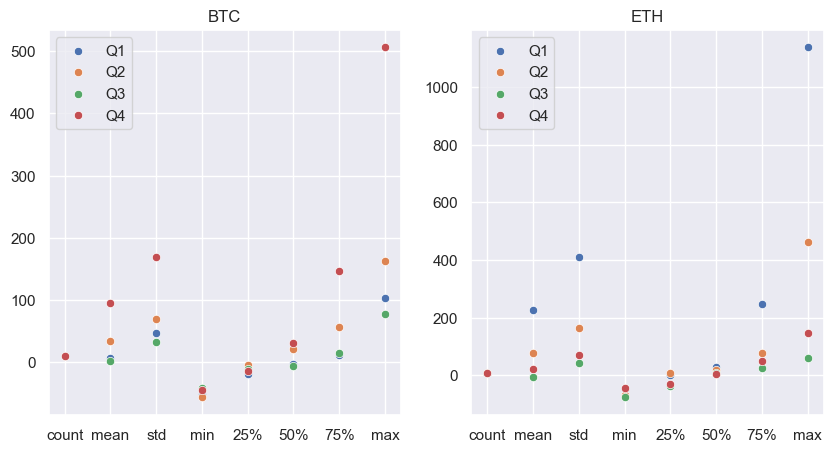

In [17]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10, 5))

quarters = [3, 6, 9, 12]

for idx, quarter in enumerate(quarters):
    df = add_returns_pct(
        df_btc_quarterly[df_btc_quarterly.index.month == quarter].copy())
    stats = df["returns_pct"].describe()
    sns.scatterplot(stats, ax=ax, label=f"Q{idx + 1}")

    df = add_returns_pct(
        df_eth_quarterly[df_eth_quarterly.index.month == quarter].copy())
    stats = df["returns_pct"].describe()
    sns.scatterplot(stats, ax=ax1, label=f"Q{idx + 1}")

ax.set_title("BTC")
ax1.set_title("ETH")
ax.set_ylabel("")
ax1.set_ylabel("")